### Импорт библиотек

In [2]:
from math import factorial
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

### Первая задача

В порту имеется один причал для разгрузки судов. Интенсивность потока судов равна 0.4 судов в 1 сут. Среднее время разгрузки одного судна составляет 2 сут. Предполагается, что очередь может быть неограниченной длины. Найти показатели эффективности работы причала, а также вероятность того, что ожидают разгрузки не более чем 2 судна.

In [5]:
# Интенсивность
lambd = 0.4

u = 1 / 2

y = lambd / u

p0 = (1 - y)
p_zan = 1 - p0

p1 = y ** 1 * (1 - y)
p2 = y ** 2 * (1 - y)
p3 = y ** 3 * (1 - y)

P_k_leq_3 = p1 + p2 + p3

m = y / (1 - y)
u = m / lambd

l = y ** 2 / (1 - y)
w = l / lambd

print(f"Вероятность простоя (p0): {round(p0, 1)}\n"
      f"Вероятность того, что в очереди не более 3 судов (P1 + P2 + P3): {P_k_leq_3:.4f}\n"
      f"Среднее число судов в очереди (l): {round(l, 1)}\n"
      f"Среднее время ожидания в очереди (w): {round(w)} суток\n"
      f"Среднее число судов в системе (m): {round(m, 1)}\n"
      f"Среднее время пребывания судна в системе (u): {round(u, 1)} суток")

Вероятность простоя (p0): 0.2
Вероятность того, что в очереди не более 3 судов (P1 + P2 + P3): 0.3904
Среднее число судов в очереди (l): 3.2
Среднее время ожидания в очереди (w): 8 суток
Среднее число судов в системе (m): 4.0
Среднее время пребывания судна в системе (u): 10.0 суток


### Вторая задача

В парикмахерской работают 3 мастера, а в зале ожидания расположены 3 стула. Поток клиентов имеет интенсивность λ = 12 клиентов в 1 ч. Среднее время обслуживания b = 20 мин. Определить относительную и абсолютную пропускную способность системы, среднее число занятых кресел, среднюю длину очереди, среднее время, которое клиент проводит в парикмахерской.

In [6]:
def calculate_p0(y, n, M):
    series = sum(y ** i / factorial(i) for i in range(n + 1))
    corr = y ** (n + 1) * (1 - (y / n) ** M) / (factorial(n) * n * (1 - y / n))
    return (series + corr) ** -1

def calculate_pi(y, n, M, p0):
    return y ** (n + M) * p0 / (n ** M * factorial(n))

def calculate_l(y, n, M, p0):
    numerator = y ** (n + 1) * (1 - (y / n) ** M * (M + 1 - M / n * y)) * p0
    divider = factorial(n) * n * (1 - y / n) ** 2
    return numerator / divider

In [7]:
n, M = 3, 3  # Количество мастеров и кресел
lambd, u = 12, 3  # Интенсивность потока клиентов и время обслуживания

λ_range, μ_range = np.meshgrid(np.linspace(0.1, 10, 50), np.linspace(0.1, 10, 50))

y = λ_range / μ_range
p0 = calculate_p0(y, n, M)
pi = calculate_pi(y, n, M, p0)

Q = 1 - pi
lambd_ = λ_range * Q
k_zan = lambd_ / μ_range
l = calculate_l(y, n, M, p0)
w = l / λ_range
m = l + k_zan
u = m / λ_range


print(f'\nЗначения p0 = {np.mean(p0):.3f},'
      f' 𝜋 = {np.mean(pi):.3f},'
      f' Q = {np.mean(Q):.3f},'
      f' λ\' = {np.mean(lambd_):.2f},'
      f' k_зан = {np.mean(k_zan):.2f},'
      f' l = {np.mean(l):.2f},'
      f' w = {np.mean(w):.2f},'
      f' m = {np.mean(m):.2f},'
      f' u = {np.mean(u):.2f}\n')


parameters = {
      'p0 (Вероятность нахождения в состоянии свободных каналов)': p0,
      'π (Вероятность отказа в обслуживании)': pi,
      'Q (Относительная пропускная способность)': Q,
      'λ\' (Абсолютная пропускная способность)': lambd_,
      'k_зан (Среднее число занятых каналов)': k_zan,
      'l (Среднее число заявок в очереди)': l,
      'w (Среднее время ожидания)': w,
      'm (Среднее число заявок в системе)': m,
      'u (Среднее время пребывания заявки в системе)': u
}




Значения p0 = 0.386, 𝜋 = 0.101, Q = 0.899, λ' = 4.37, k_зан = 1.25, l = 0.45, w = 0.09, m = 1.70, u = 0.38



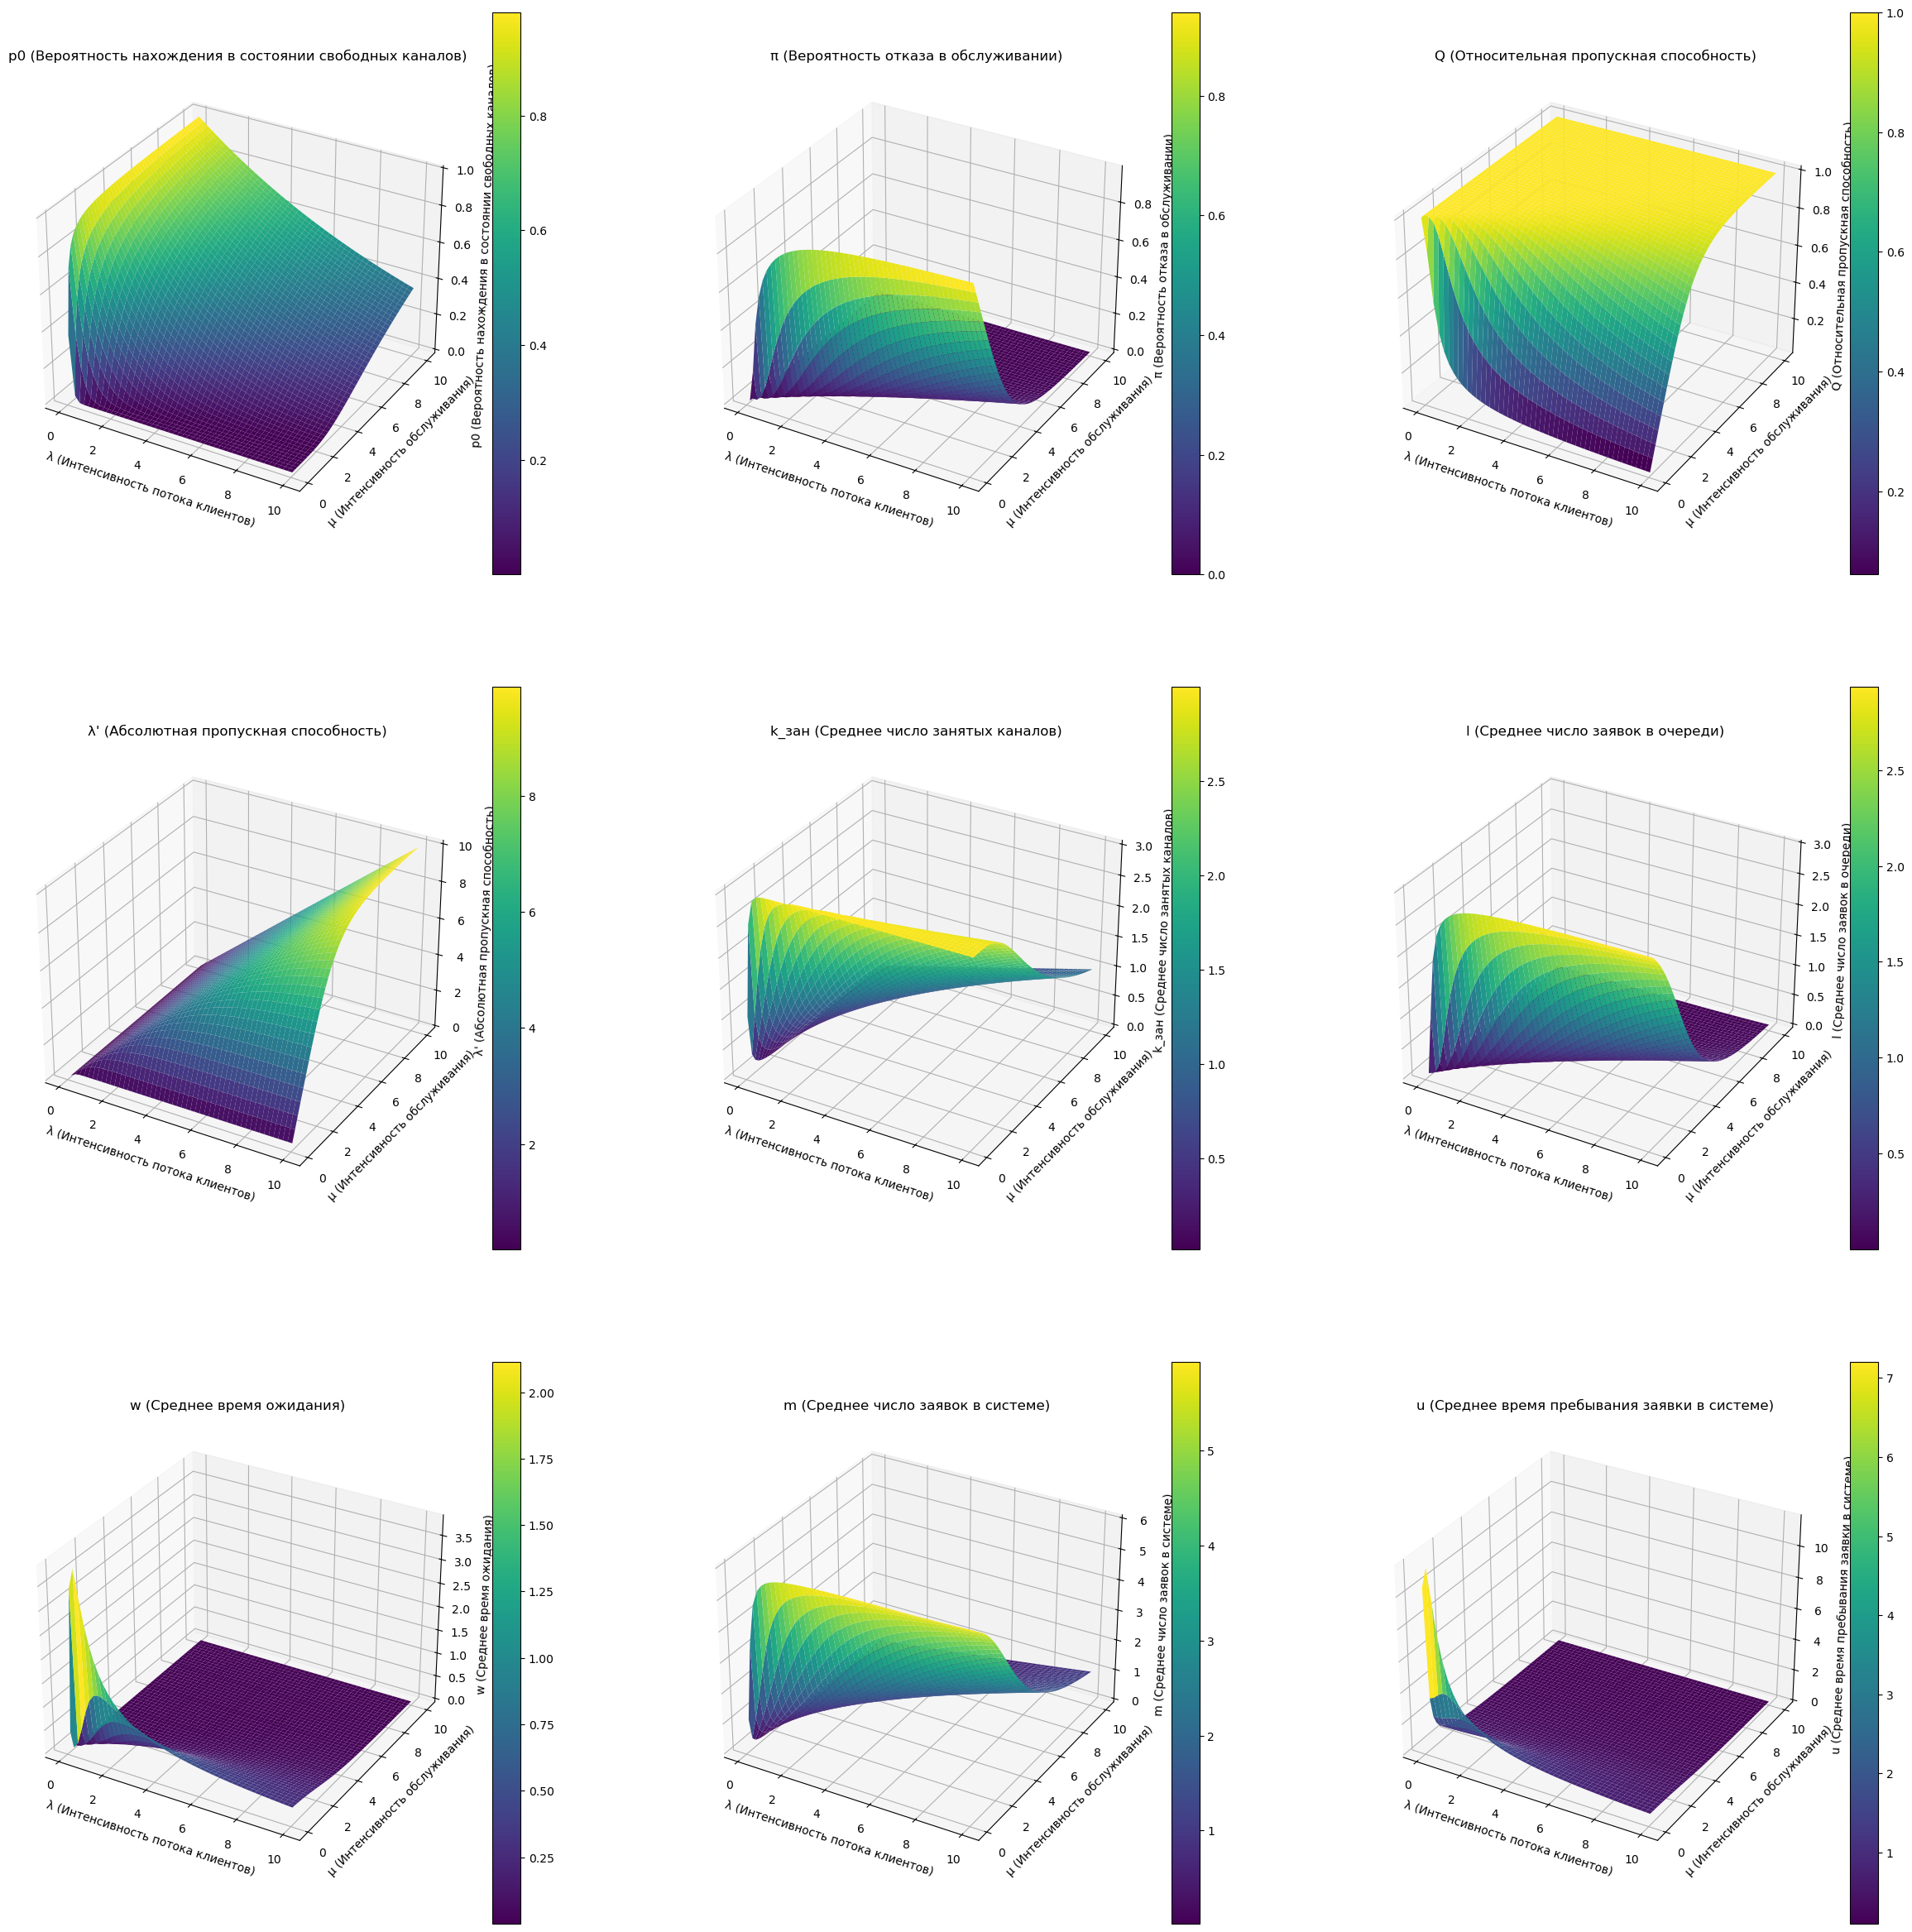

In [ ]:
i = 1

fig = plt.figure(figsize=(30, 30))

for name, value in parameters.items():
      
      ax = fig.add_subplot(3, 3, i, projection='3d')
      i += 1
      surf = ax.plot_surface(λ_range, μ_range, value, cmap='viridis', edgecolor='none')
      ax.set_title(name)
      ax.set_xlabel('λ (Интенсивность потока клиентов)')
      ax.set_ylabel('μ (Интенсивность обслуживания)')
      ax.set_zlabel(name)
      fig.colorbar(surf, ax=ax)

